<a href="https://colab.research.google.com/github/Srijan-Rai/Appliane-Energy-Prediction/blob/main/ApplianceEnergyPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Appliance Energy Prediction**

---
In the modern era of development, energy plays a vital role for various households and industries. In today’s time, there are many places, especially in the developing world where there are outages. Hence having proper knowledge of energy consumption by various household appliances could help us to tackle such problems.

In this project, we will be building a Machine Learning model to predict the energy consumption of various appliances in an apartment.

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.

Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged with the experimental data sets using the date and time column. 

Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

The approach taken to achieve the objective of the project:


*   Understanding the data
*   Data Preprocessing
*   Exploratory Data Analysis
*   Building different machine learning models.
*   Choosing the best model based on the necessary evaluation metrics.






## Problem Statement 
In this project we are provided with a dataset, where we need to predict the Appliance energy consumption for a house based on various features provided in the dataset. In order to achieve this, we need to develop a supervised learning model using regression algorithms. 

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style = "darkgrid")
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

## **Reading and understanding the data**

In [2]:
# mounting the drive to obtain the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the dataset
path = "/content/drive/My Drive/Colab Notebooks/Appliance Energy Prediction(Regression Project)/data_application_energy.csv"
df= pd.read_csv(path)

In [4]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

## **Dataset Columns**
The dataset consists of the following columns:


* **date** - time year-month-day hour:minute:second
* **Appliances** - energy use in Wh (Dependent variable)
* **lights** - energy use of light fixtures in the house in Wh
* **T1** - Temperature in kitchen area, in Celsius
* **RH1** - Humidity in kitchen area, in %
* **T2** - Temperature in living room area, in Celsius
* **RH2** - Humidity in living room area, in %
* **T3** - Temperature in laundry room area
* **RH3** - Humidity in laundry room area, in %
* **T4** - Temperature in office room, in Celsius
* **RH4** - Humidity in office room, in %
* **T5** - Temperature in bathroom, in Celsius
* **RH5** - Humidity in bathroom, in %
* **T6** - Temperature outside the building (north side), in Celsius
* **RH6** - Humidity outside the building (north side), in %
* **T7** - Temperature in ironing room, in Celsius
* **RH7** - Humidity in ironing room, in %
* **T8** - Temperature in teenager room 2, in Celsius
* **RH8** - Humidity in teenager room 2, in %
* **T9** - Temperature in parents room, in Celsius
* **RH9** - Humidity in parents room, in %
* **T_out** - Temperature outside (from Chievres weather station), in Celsius
* **Pressure** - (from Chievres weather station), in mm Hg RHout
* **Humidity** - outside (from Chievres weather station), in %
* **Wind speed** - (from Chievres weather station), in m/s
* **Visibility** - (from Chievres weather station), in km
* **Tdewpoint** - (from Chievres weather station), Â°C
* **rv1** - Random variable 1, nondimensional
* **rv2** - Random variable 2, nondimensional

## **Exploratory Data Analysis**

### **Head and Tail**

### **Energy Utilization using date-time**

To obtain some additional insights from the data we will use the date column and obtain the hours and weekdays from it.

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df['hour']=(df['date'].dt.hour)+((df['date'].dt.minute)/60)
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,17.000000
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,17.166667
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,17.333333
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,17.500000
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,17.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,17.333333
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,17.500000
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,17.666667
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,17.833333


In [7]:
# Head of the data frame
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,17.000000
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,17.166667
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,17.333333
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,17.500000
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,17.666667


In [8]:
# Tail of the data
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,17.333333
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,17.500000
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,17.666667
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,17.833333
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851,18.000000


### **Data Exploration**

In [9]:
df.shape

(19735, 30)

We can see that there are 19735 rows and 29 columns in the data provided.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

We can split the data frame into humidity, temperature, and other features to study the data more clearly.

In [11]:
temperature = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9','T_out']]
humidity = df[['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9','RH_out']]
other_features = df[["Appliances","lights",'Press_mm_hg','Windspeed','Visibility','Tdewpoint','rv1','rv2']]

In [12]:
temperature.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T_out
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828,7.411665
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712,5.317409
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,-5.000000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000,3.666667
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000,6.916667
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000,10.408333
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000,26.100000


* We can see the temperatures across various rooms inside the apartment are similar 
*T6 and T_out which are temperatures outside the building has a high variance compared to the apartment rooms, this might be due to changes in the weather conditions.

In [13]:
humidity.describe()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,RH_out
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401,79.750418
std,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497,14.901088
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,24.000000
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000,70.333333
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000,83.666667
75%,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095,91.666667
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,100.000000


*   We can see the humidity of the rooms are almost similar to each other
*   RH_6 and RH_out which are the  humidity outside the building may have some effect of change in weather conditions



In [14]:
other_features.describe()

,Appliances,lights,Press_mm_hg,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,755.522602,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,7.399441,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,729.300000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,750.933333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,756.100000,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,760.933333,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,772.300000,14.000000,66.000000,15.500000,49.996530,49.996530


* We can see the appliances has an unusually high maximum value. This might contain some outliers
* 75% or more values of lights are 0, and hence this column may not play any significant role in building the regression model. Hence dropping this feature would be a good decision 

In [15]:
# Dropping lights column
df.drop("lights",axis=1,inplace=True)

In [16]:
# Find duplicates in the dataframe
print(df.duplicated().value_counts())

False    19735
dtype: int64


There are no duplicate values in the dataframe

In [17]:
# checking the presence of null values in the data frame
print(df.isna().sum())

date           0
Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
hour           0
dtype: int64


### **Outlier Detection**

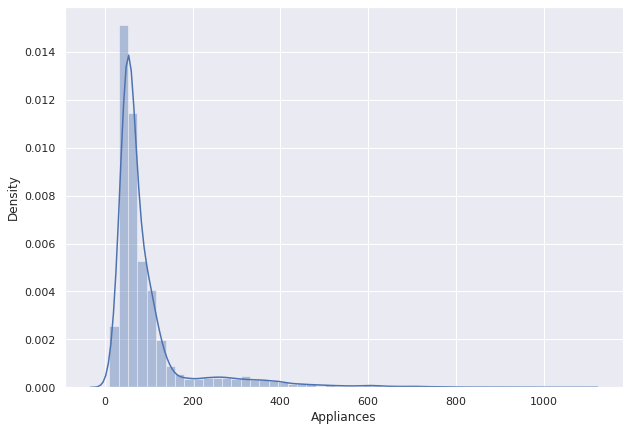

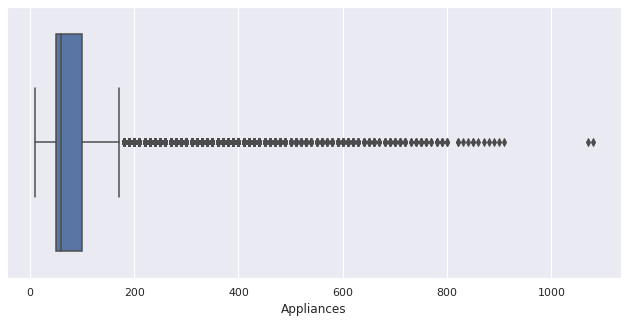

In [18]:
# Detecting outliers in appliances
plt.figure(figsize=(10,7))
sns.distplot(df['Appliances'])
plt.figure(figsize=(11,5))
sns.boxplot(data=df, x='Appliances')



As we can see from the above distributions of the appliance energy, we can say that the appliance energy level above 400 would be considered an outlier and would be removed from the data frame

In [19]:
# Remove outliers in appliances i.e values above 400
df = df[df["Appliances"]<400]

In [20]:
# Checking for negative appliance energy
df[df['Appliances']<0]

,date,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour


Let us now check the distribution of the different features provided in the dataset to get some useful insights 

### **Data Distribution**

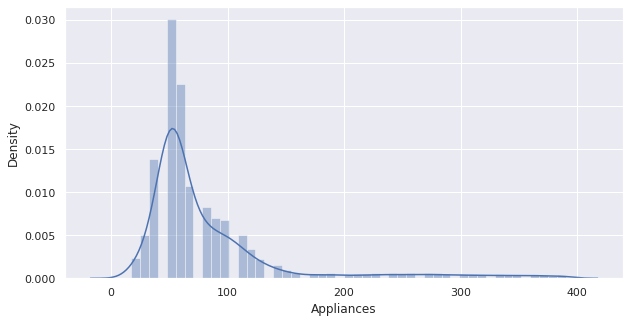

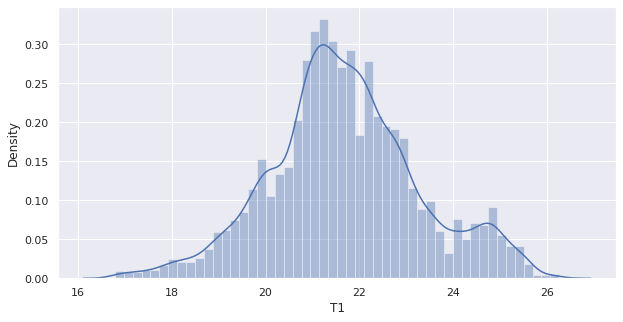

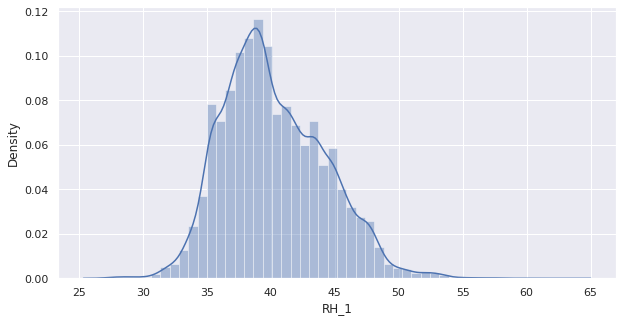

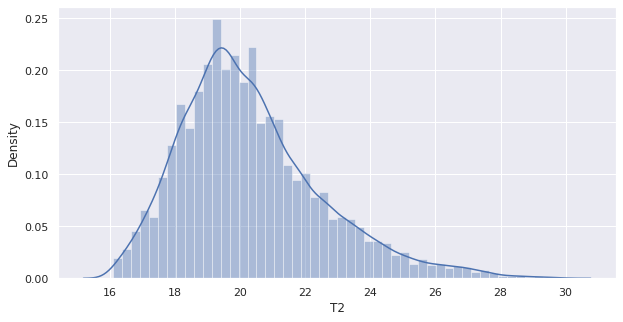

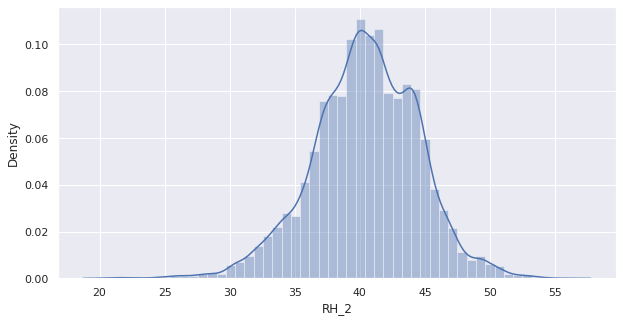

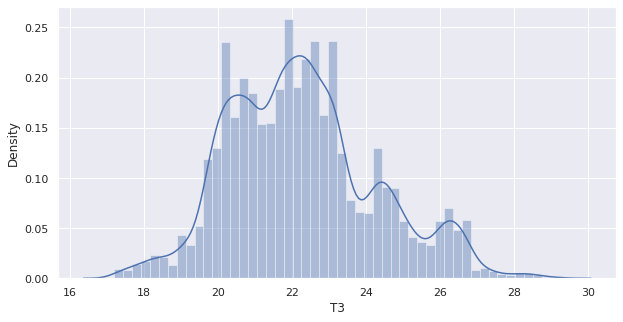

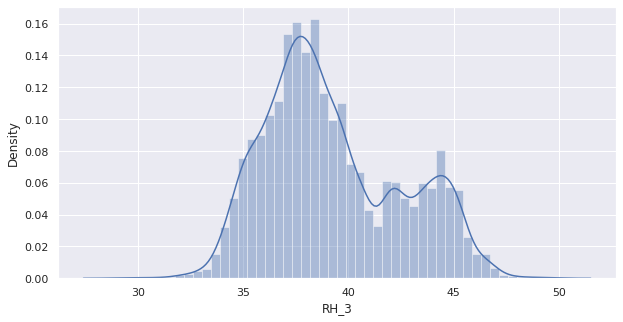

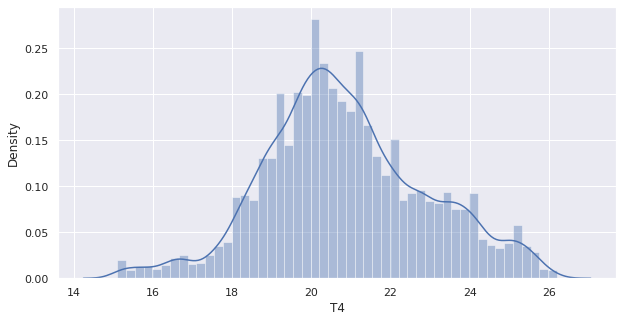

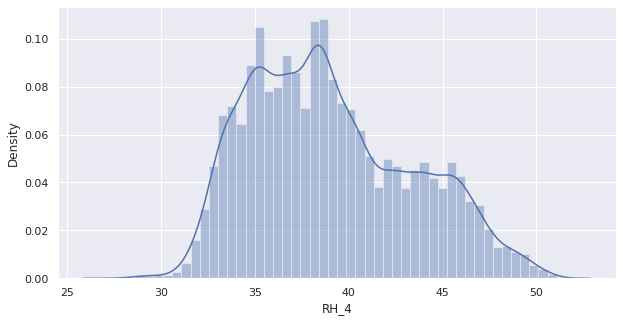

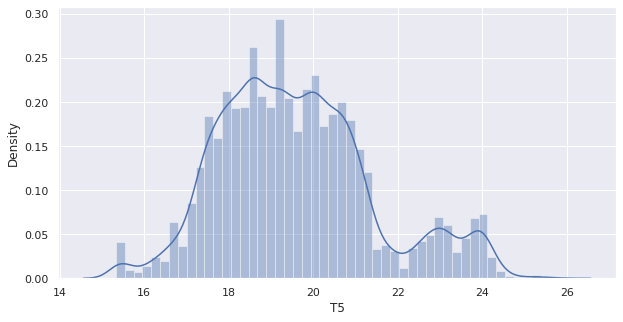

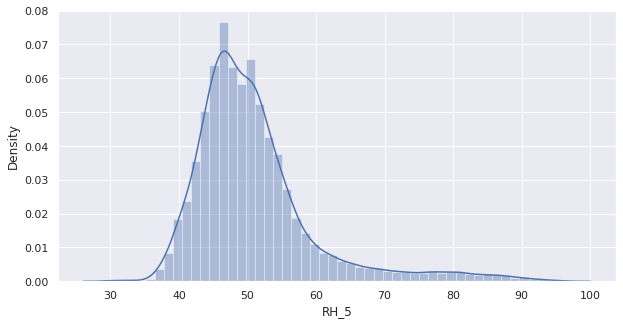

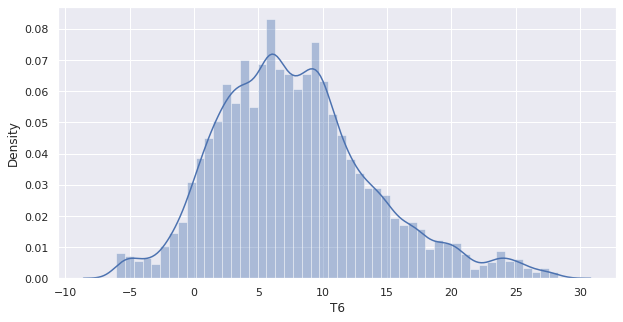

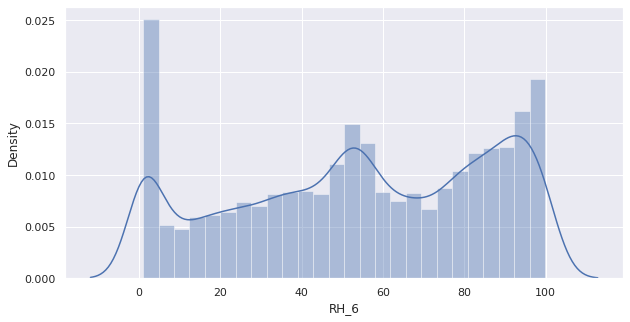

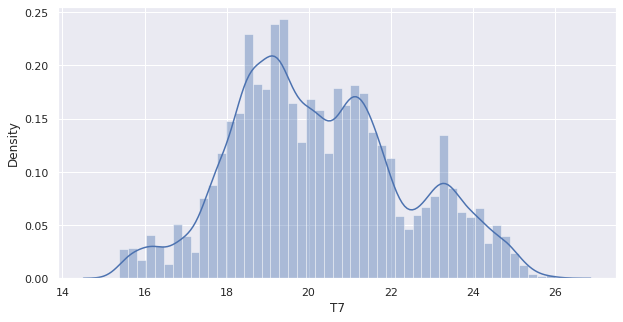

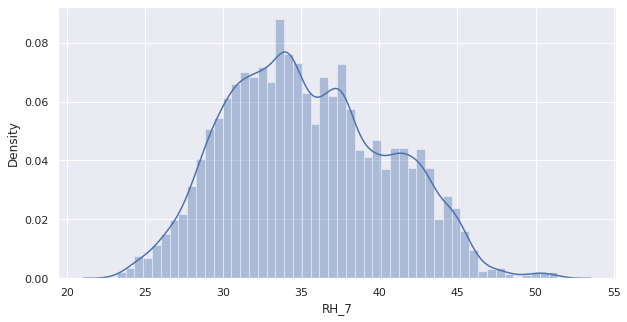

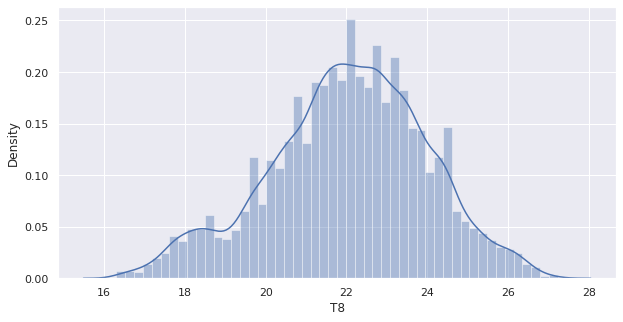

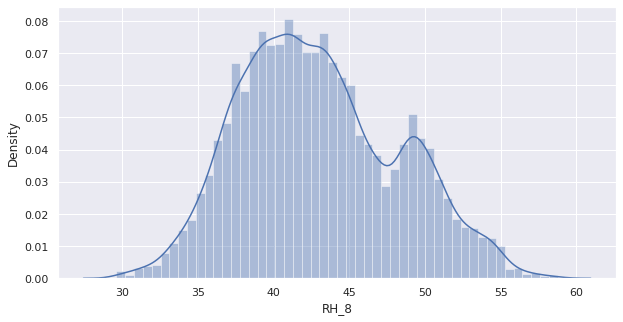

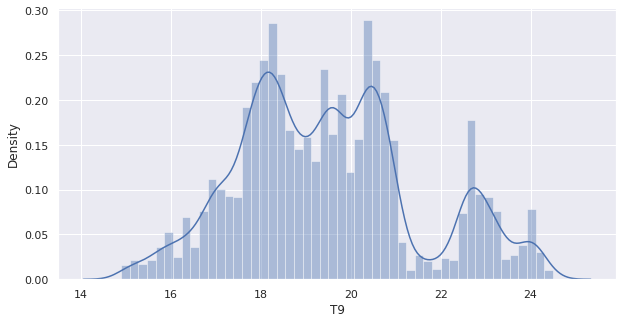

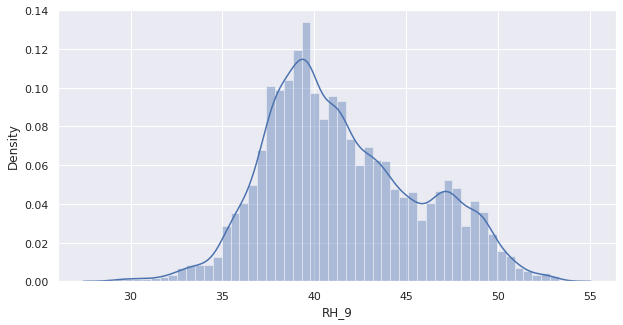

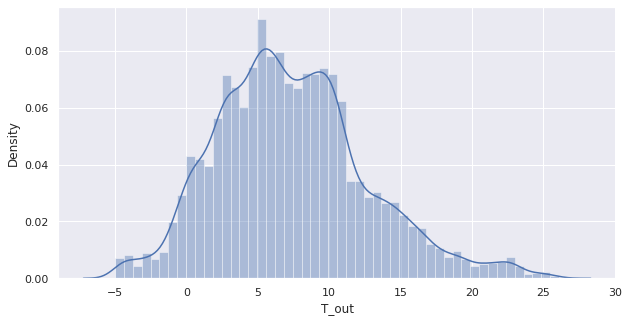

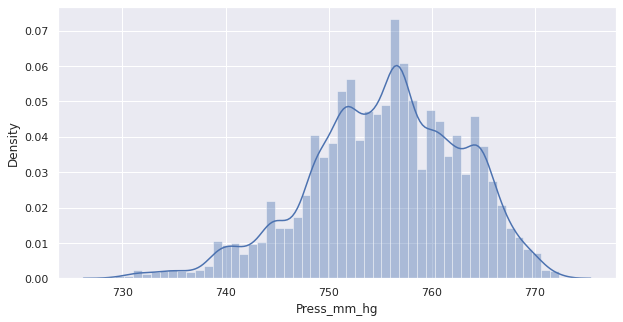

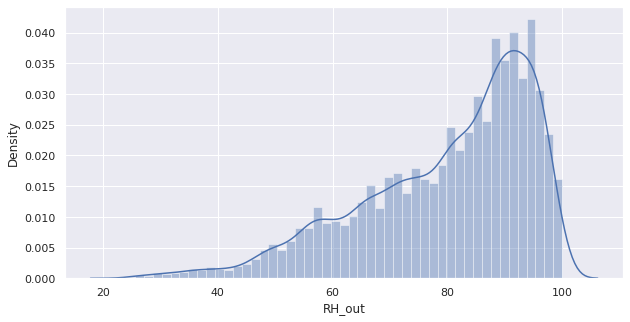

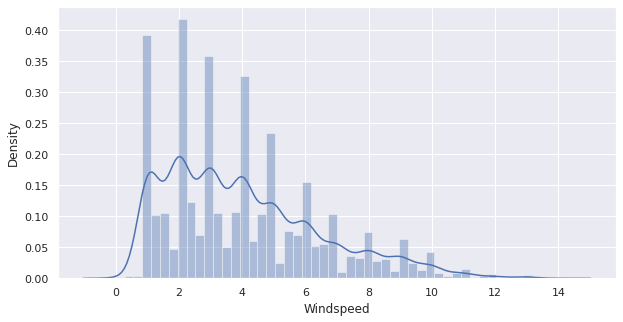

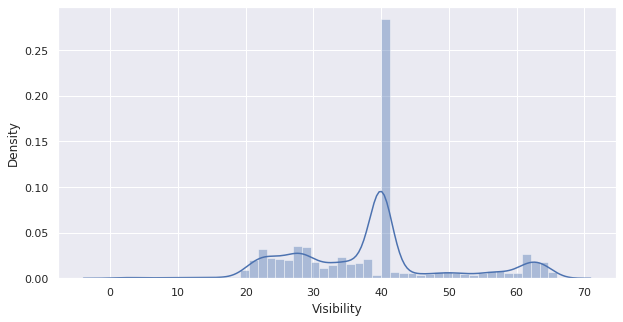

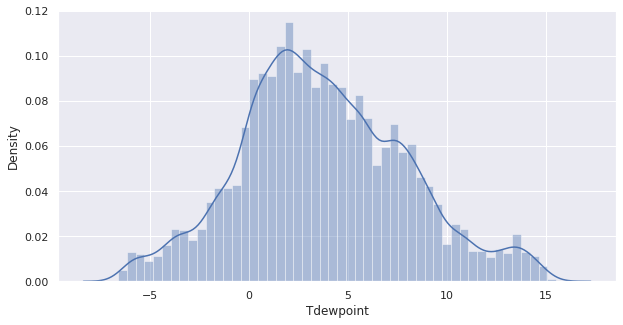

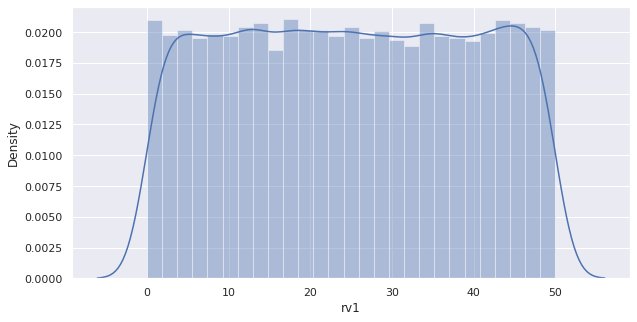

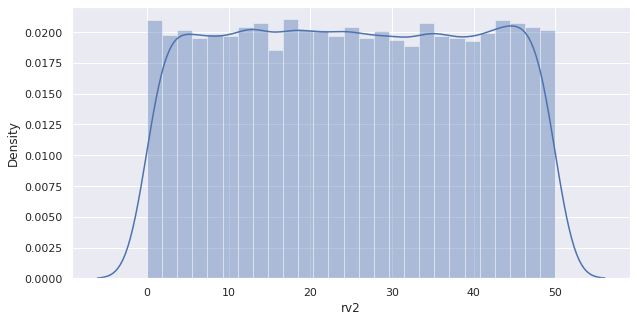

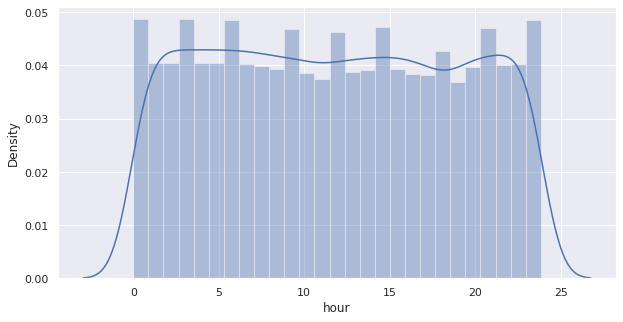

In [21]:
# Using distplot from seaborn to visualize data distribution
for col in df.describe().columns:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  

Observations from the above data distribution plots:
*   All the temperatures follow almost a normal distribution pattern, Except T9.
*   Except RH_6 and RH_out, the rest of the humidity columns follow a normal distribution.
* The Appliance column has a positively skewed distribution. Most of the energy usage is between 0 Wh to 100Wh.
*   The Windspeed shows a positively skewed distribution.
*   The two random variables follow a continuous distribution.






### **Energy Utilization using date-time**

To obtain some additional insights from the data we will use the date column and obtain the hours and weekdays from it.

In [22]:
df['date'] = pd.to_datetime(df['date'])

In [23]:
df['hour']=(df['date'].dt.hour)+((df['date'].dt.minute)/60)
df

,date,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour
0,2016-01-11 17:00:00,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,45.530000,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,17.000000
1,2016-01-11 17:10:00,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,45.560000,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,17.166667
2,2016-01-11 17:20:00,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,45.500000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,17.333333
3,2016-01-11 17:30:00,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,45.400000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,17.500000
4,2016-01-11 17:40:00,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,45.400000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,17.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19728,2016-05-27 17:00:00,110,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000,24.700000,45.626667,...,46.751429,23.000000,755.2,55.000000,3.000000,22.000000,13.400000,18.248201,18.248201,17.000000
19729,2016-05-27 17:10:00,90,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,24.700000,45.626667,...,46.745000,22.866667,755.2,55.333333,3.166667,22.833333,13.366667,16.966162,16.966162,17.166667
19730,2016-05-27 17:20:00,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,46.790000,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,17.333333
19731,2016-05-27 17:30:00,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,46.790000,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,17.500000


([<matplotlib.axis.XTick at 0x7fac027c9ad0>,
 <a list of 25 Text major ticklabel objects>)

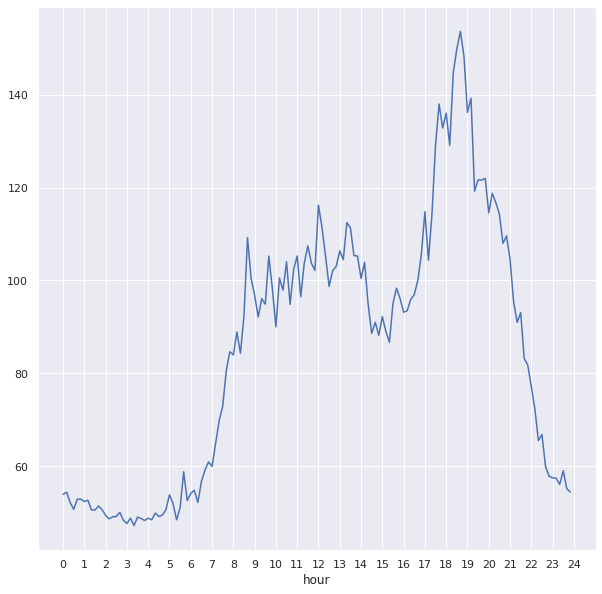

In [24]:
plt.figure(figsize=(10,10))
df.groupby("hour")["Appliances"].mean().plot()
sns.set_theme(style = "darkgrid")
plt.xticks(list(range(0, 25)))

From the above Line graph:
The Energy utilization for the house is highest during the evening 6pm to 7pm. 

In [25]:
df['weekday'] = df['date'].dt.weekday

Text(0.5, 1.0, 'Appliance Energy Consumption for Different Weeksdays')

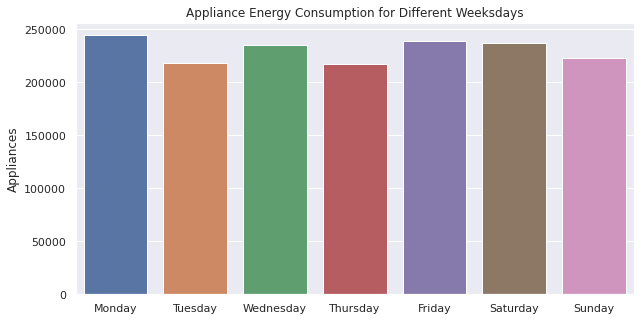

In [26]:
Weekwise_Consumption = df.groupby('weekday')['Appliances'].sum()
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.barplot(x= ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],y = Weekwise_Consumption)
plt.title("Appliance Energy Consumption for Different Weeksdays")


From the above bar graph, we can say that the consumption of energy is more on Monday, Friday, and Saturday when compared to the rest of the week.

In [27]:
df.drop(columns=["date","hour","weekday"], inplace = True)

## **Determine Correlation**

### Variance Inflation Factor(VIF)

In [28]:
# Importing the necessary library
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
print(vif_data)

        feature          VIF
0    Appliances     3.183613
1            T1  3662.579128
2          RH_1  1777.967107
3            T2  2563.044332
4          RH_2  2279.783664
5            T3  1318.382032
6          RH_3  1618.283383
7            T4   940.267483
8          RH_4  1367.064242
9            T5  1199.308638
10         RH_5    45.400233
11           T6    88.541061
12         RH_6    40.718519
13           T7  1635.148732
14         RH_7   515.027455
15           T8   994.307250
16         RH_8   577.621196
17           T9  2558.201065
18         RH_9   642.515759
19        T_out   397.760512
20  Press_mm_hg  2080.575226
21       RH_out  1299.499219
22    Windspeed     5.236779
23   Visibility    11.927166
24    Tdewpoint   132.232225
25          rv1          inf
26          rv2          inf


*   We have considered the variance inflation factor to determine the Multicollinearity.
*   A feature VIF above 5 is usually considered a highly collinear feature.

*   The above data frame with VIF factors does not yield the required data to consider multi-collinearity. Hence we will use the heatmap approach to determine the correlation between the features.





### Correraltion Plot

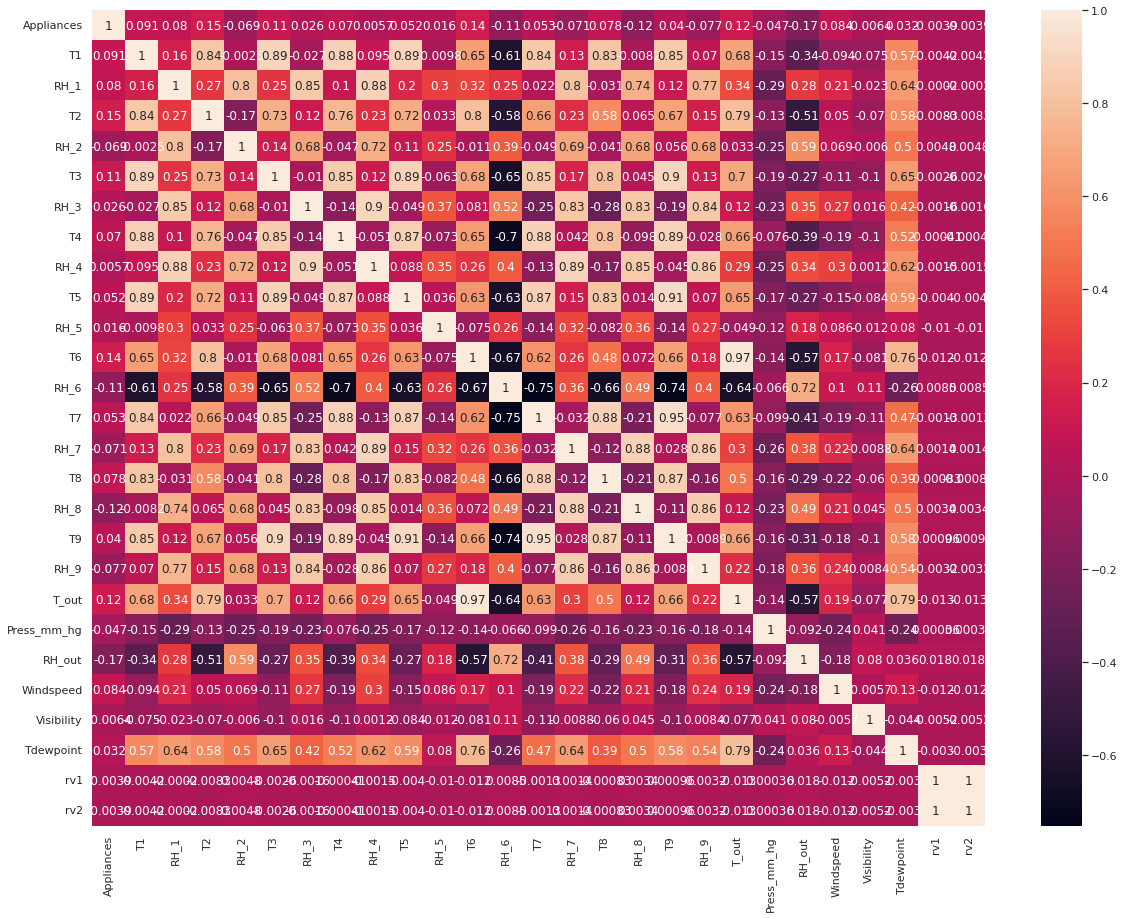

In [58]:
cor = df.corr()
plt.figure(figsize = (20,15))
sns.heatmap(cor,annot = True)

From the above heatmap:


*   The random variables rv1 and rv2 are having a correlation value of 1 and when compared to other features the correlation of these two variables is very less with the Appliance. Hence, dropping one of these variables could be a better option.
*   Temprature T9 shows very high correlation with T3,T5 and T7. This variable will affect the linear regression algorithm and hence dropping it.
*  The Humidity RH_6 shows high negative correlation with all the temperatures present in the data frame, hence this humidity value can also be dropped. 





In [59]:
# Removing the highly correlated random variables
df.drop(columns=["rv2","T9","RH_6"], inplace=True)

## **Regression Models**

From the above steps, we have understood the data and we have done the necessary data cleaning operations to obtain the data which can be further utilized to obtain a regression model which can be applied to the data for further predictions.
  
In this step, we will be building various machine learning regression models and will be selecting the best model for the given data set using the necessary metrics for model selection.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from math import sqrt

The necessary libraries are imported to obtain the regression models.
*   The **train_test_split** is used to split the data set into training an testing datasets.
*   **r2_score**, **mean_absolute_error** and, **mean_squared_error** are the metrics which will help us to decide the best performing model.
*   From the above data analysis, we got to know that some of the features are having skewed data distribution as well as the scaling for the different features are not uniform. To handle the scaling issue in the data frame, we will be using the **StandardScaler** to scale all the featues in the dataframe.






In [ ]:
# Scaling and spitting the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
data = pd.DataFrame(scaled_data, columns = df.columns)
x =data.drop("Appliances", axis =1)
y = data["Appliances"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=42, test_size= 0.3)

In [ ]:
def ML_Models(Models):
  model_result = []
  for modelname, method in Models:
    current_model_result = dict()
    model = method
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    current_model_result["Model Name"] = modelname
    current_model_result["r2_score"] = r2_score(ytest,ypred)
    current_model_result["RSME"] = sqrt(mean_squared_error(ytest,ypred))
    current_model_result["MAE"] = mean_absolute_error(ytest,ypred)
    model_result.append(current_model_result)
  return model_result



The above function takes various machine learning models as its argument after that it fits the data to the model and, then returns the necessary metrics for the particular model which we pass into the function. 

### **Linear Regression and its Variants**

In [ ]:
# Simple linear regression models and its variants
Linearmodels = [["LinearRegression", LinearRegression()],['Lasso', Lasso()],['Ridge', Ridge()]]

In [ ]:
# obtaining results for the above Linear regression models
Linear_model_result = ML_Models(Linearmodels)

In [ ]:
Linear_model_result = pd.DataFrame(Linear_model_result)
Linear_model_result

,Model Name,r2_score,RSME,MAE
0,LinearRegression,0.240856,0.887135,0.567547
1,Lasso,-0.000104,1.018240,0.694981
2,Ridge,0.240850,0.887138,0.567516


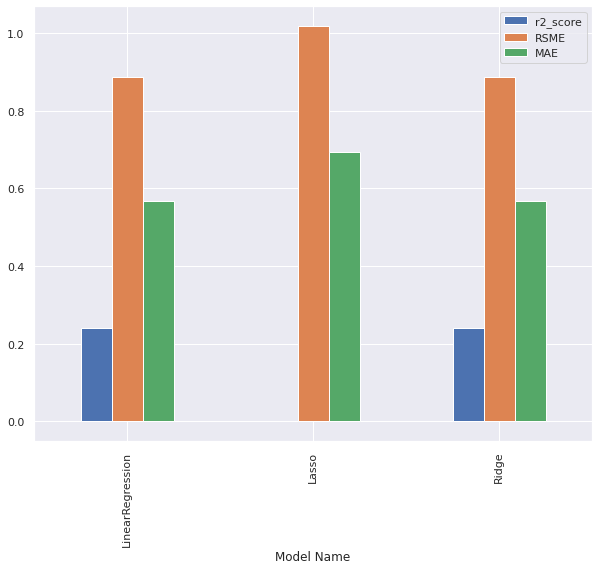

In [ ]:
# plotting the metrics for different models using bar graph.
Linear_model_result.plot(x="Model Name",y = ["r2_score","RSME","MAE"],kind = "bar", figsize= (10,8))

From the above Linear regression models, we can see that the Lasso is the worst performing model with the least r2_score as well as high errors. The simple linear regression and the ridge regression models have almost similar performance.

From the above Linear regression models, we did not get any impressive results as the r2_score of all the models are very low, and also the errors are very high. Hence we should look into some advanced machine learning models to obtain a good r2_score with fewer errors.

### **Tree based models**

In [ ]:
TreeModels = [["DecisionTree", DecisionTreeRegressor()],["RandomForest", RandomForestRegressor()],['GradientBoosting', GradientBoostingRegressor()],['XgBoost', XGBRegressor()]]


In [ ]:
Tree_model_result =  ML_Models(TreeModels)

[12:12:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
Tree_model_result = pd.DataFrame(Tree_model_result)
Tree_model_result

,Model Name,r2_score,RSME,MAE
0,DecisionTree,0.304892,0.848895,0.437947
1,RandomForest,0.596959,0.646401,0.351672
2,GradientBoosting,0.342307,0.825732,0.512822
3,XgBoost,0.342878,0.825373,0.511871


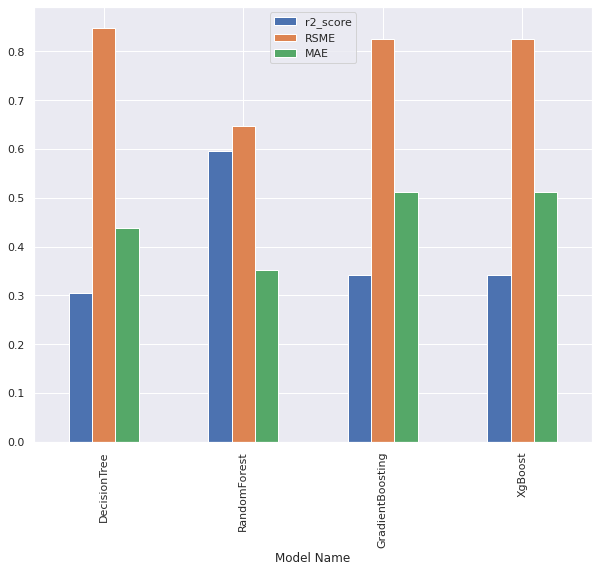

In [ ]:
Tree_model_result.plot(x="Model Name",y = ["r2_score","RSME","MAE"],kind = "bar", figsize= (10,8))

As we can see the tree-based models performs relatively better than the linear regression models.

Amongst them, the Random forest regressor models have a very good performance with a good r2_score and fewer errors.

## **Hyper Parameter Tuning**

From the above regression models, the Random forest model outperforms all the rest of the selected models. But we cannot be sure that this is the best we can get from this model. Hence we need to perform hyper parameter tuning on this model. And obtain the best parameters of this model for the given dataset. 

We will perform this hyper parameter tuning using GridSearchCV library.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
regressor = RandomForestRegressor(random_state=42)
grid_values = {'n_estimators':[50, 80,  100, 120, 150], 'max_depth': [10, 20,30,40,50], 'max_features': ["auto", "sqrt", "log2"]}
reg = GridSearchCV(regressor, param_grid = grid_values, scoring = 'r2', cv=3)
reg.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 80, 100, 120, 150]},
             scoring='r2')

The Hyper Parameters we considered for tuning are:

*   n_estimator - The number of trees in the forest.  
*   max_depth - The maximum depth of the tree.
*   max_features - The number of features to consider when looking for the best split

The tuning was done by condisering the best r2_score and we have done 3 cross validations.


In [ ]:
reg.best_params_

{'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 150}

In [ ]:
reg.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=150,
                      random_state=42)

In [ ]:
ypred = reg.predict(xtest)

In [ ]:
r2_score(ytest,ypred)

0.6042131248360507

From the Hyper parameter tuning, we have obtained a regression model with better r2_score. Also the model parameters which yields this score is also obtained.

### Feature Importance

In [ ]:
features = xtrain.columns
importances = reg.best_estimator_.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

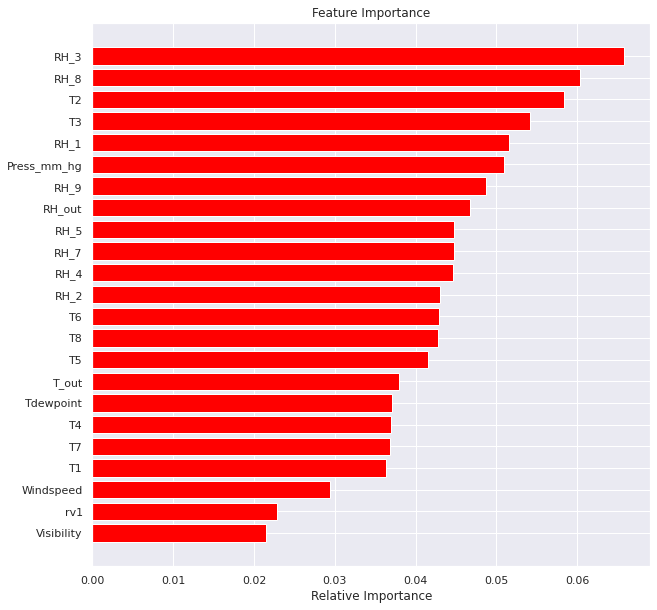

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

From the above feature importance bar plot, the top 5 features, which affects the model predictions are:


*  RH3: Humidity in laundry room area
*   RH8:
Humidity in teenager room 2
*   T2: Temperature in living room area
*   T3: Temperature in laundry room area
*   RH1: Humidity in kitchen area




## Conclusion



*   The Energy utilization for the house is highest during the evening 6pm to 7pm.
*   Monday, Friday and Saturday are the week days with high energy consumption.
*   23 features were considered to build the final model among the given 30 features.
*   The best performing regression model among the various considered model is the Random Forest Regressor.
*   The r2_score of the selected model is 0.604, which means 60.4% variation in the energy consumption can be predicted by the regression model.


*   Humidity in laundry room area, Humidity in teenager room 2, Temperature in living room area, Temperature in laundry room area,Humidity in kitchen area are the mjor features affecting the selected model predition.




